In [2]:
import pandas as pd
import os
print(os.getcwd())
parent = 'results_publication2/tcrdist_optimisation'
results = pd.concat([pd.read_csv(os.path.join(parent, file,'total.csv'), index_col=0) for file in os.listdir(parent) if os.path.isdir(os.path.join(parent, file))])

from ast import literal_eval
results['Runtime']=results['Runtime'].apply(literal_eval).apply(lambda x: sum(x) if type(x)==list else x)

/Users/danhudson/Documents/Academic/Oxford/Oxford_DPhil/DPhil/Software/ClustOx


/var/folders/pp/qphvqyn14wl91lgf7368sfmw0000gn/T/ipykernel_2790/2132609865.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub['tcrdist_Hyper']=sub['tcrdist_Hyper'].astype(int)


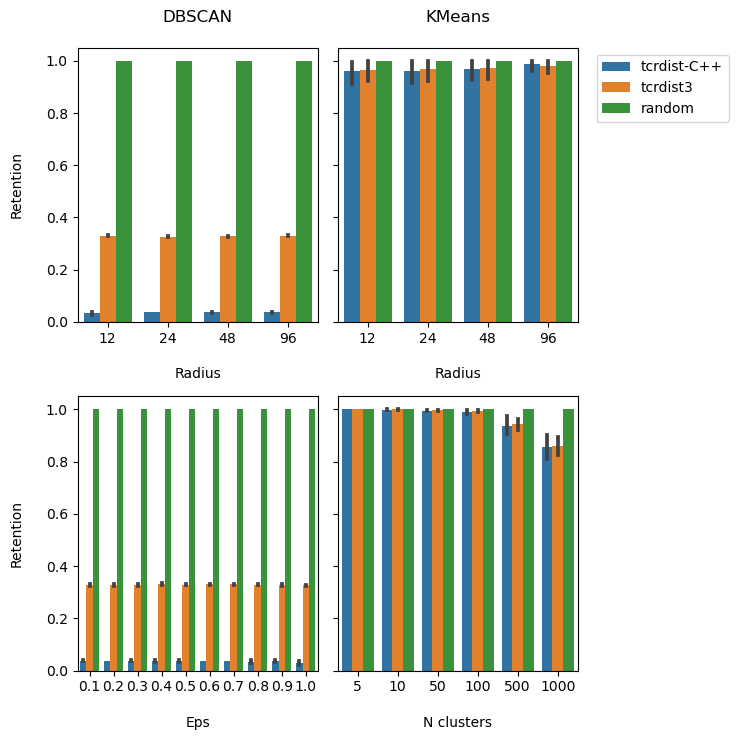

/var/folders/pp/qphvqyn14wl91lgf7368sfmw0000gn/T/ipykernel_2790/2132609865.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub['tcrdist_Hyper']=sub['tcrdist_Hyper'].astype(int)


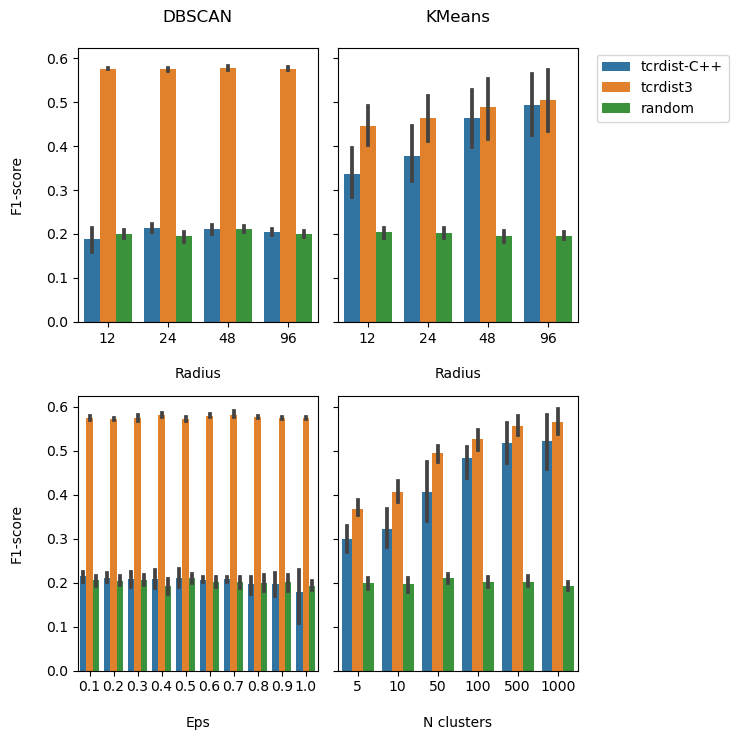

/var/folders/pp/qphvqyn14wl91lgf7368sfmw0000gn/T/ipykernel_2790/2132609865.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub['tcrdist_Hyper']=sub['tcrdist_Hyper'].astype(int)


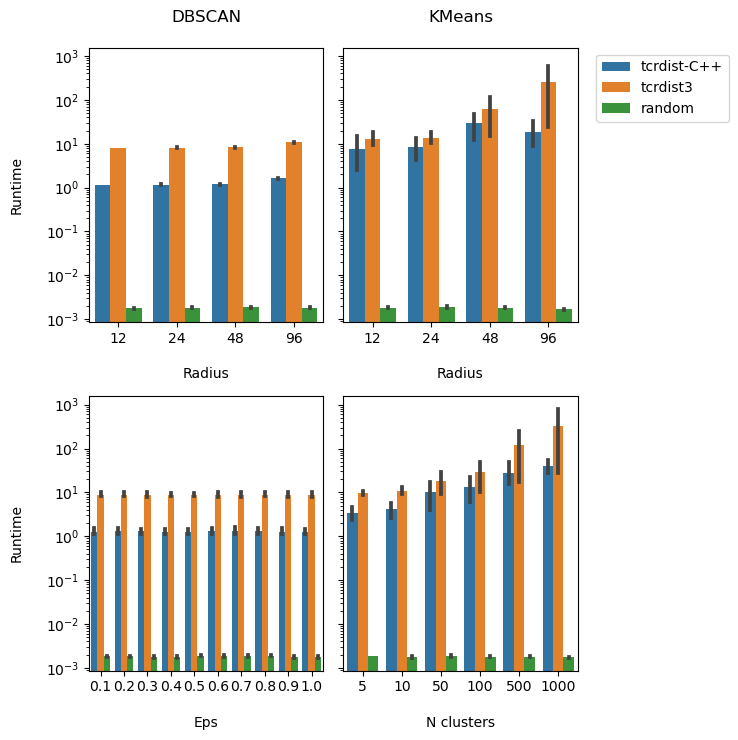

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

names = ['DBSCAN', 
         'KMeans']

# results['N_clusters']=results['N_clusters'].astype(int).astype(str)
hue_order = ['tcrdist-C++', 'tcrdist3','random']

results['Model']=results['Model'].replace({'tcrdist': 'tcrdist-C++'})

for metric in ['retention', 
               'f1-score',
               'Runtime']:
    fig, ax = plt.subplots(2, 2, 
                           figsize = (7.5,7.5),
                           sharey=True)
    for m, model in enumerate(results['tcrdist_Method'].unique()):
        sub = results[results['tcrdist_Method']==model]
        
        if model =='DBSCAN':
            sub=sub[sub['tcrdist_Hyper']<=1]
        else:
            sub['tcrdist_Hyper']=sub['tcrdist_Hyper'].astype(int)
        sns.barplot(data= sub, 
                    x = 'tcrdist_Radius',
                    y= metric,
                    hue = 'Model',
                    hue_order=hue_order,
                    ax=ax[0][m])
        ax[0][m].set_title('%s\n'%(names[m]))
        sns.barplot(data= sub, 
                    x = 'tcrdist_Hyper',
                    y= metric,
                    hue = 'Model',
                    hue_order=hue_order,
                    ax=ax[1][m])
        # ax[1][m].set_title(model)
        for i in [0, 1]:
            if (m ==1)&(i==0):
                ax[i][m].legend(loc=2, bbox_to_anchor=(1.05, 1))
            else:
                ax[i][m].legend([],[], frameon=False)
            if m ==0:
                ax[i][m].set_ylabel('%s\n'%(metric.capitalize()))
                
            else:
                ax[i][m].set_ylabel(None)
            if i==0:
                ax[i][m].set_xlabel('\nRadius')
            else:
                ax[i][0].set_xlabel('\nEps')
                ax[i][1].set_xlabel('\nN clusters')
    if metric =='Runtime':
        plt.yscale('log')
    fig.tight_layout()
    plt.show()

    

In [16]:
import numpy as np
parent = 'results_publication2/tcrdist_oom'
results = pd.concat([pd.read_csv(os.path.join(parent, file,'total.csv'), index_col=0) for file in os.listdir(parent) if os.path.isdir(os.path.join(parent, file))])
results['Runtime']=results['Runtime'].apply(literal_eval).apply(lambda x: sum(x) if type(x)==list else x)

sub = results[(results['Datetime'].isin(['20231018_115752',
                                         '20231018_120945']))]
sub['tcrdist_Chunk']=sub['tcrdist_Chunk'].replace({True: 'Chunk',
                                                   np.nan: 'No-Chunk'})
sub['model_chunk']=[x[0]+'-'+x[1] if x[0]=='tcrdist3' else 'random' for x in zip(sub['Model'], sub['tcrdist_Chunk'])]

/var/folders/pp/qphvqyn14wl91lgf7368sfmw0000gn/T/ipykernel_2790/3841104168.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub['tcrdist_Chunk']=sub['tcrdist_Chunk'].replace({True: 'Chunk',
/var/folders/pp/qphvqyn14wl91lgf7368sfmw0000gn/T/ipykernel_2790/3841104168.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub['model_chunk']=[x[0]+'-'+x[1] if x[0]=='tcrdist3' else 'random' for x in zip(sub['Model'], sub['tcrdist_Chunk'])]


In [63]:
sub.to_csv(os.path.join(parent, 'results.csv'))

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


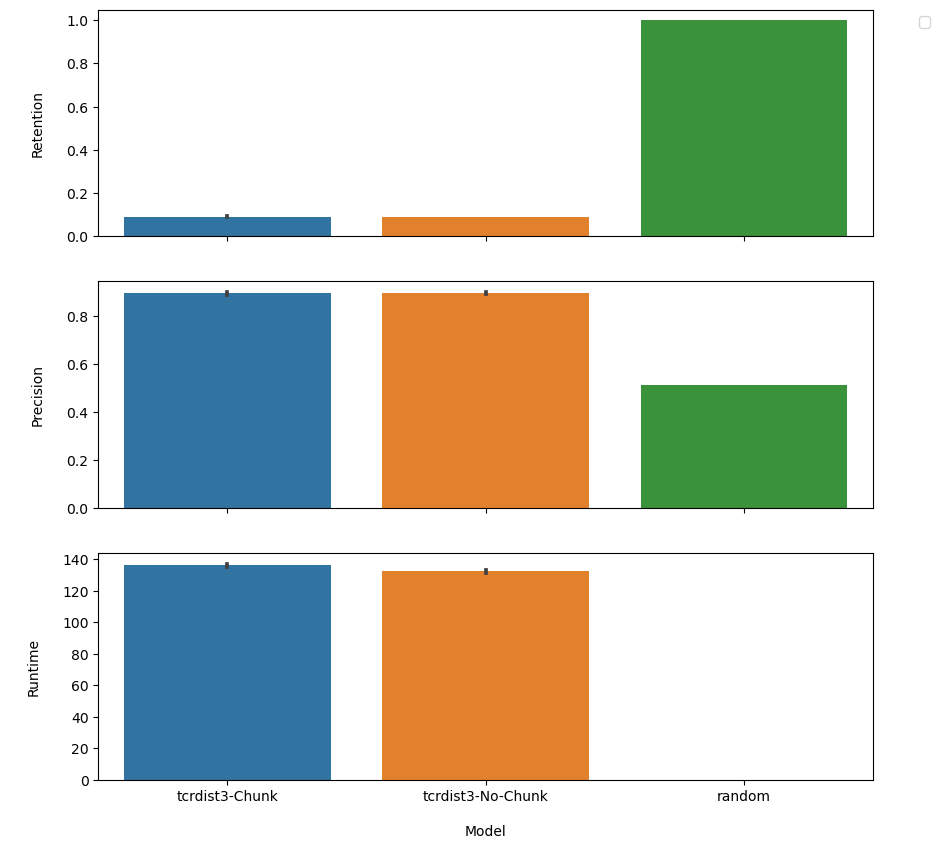

In [19]:
order = ['tcrdist3-Chunk', 'tcrdist3-No-Chunk', 'random']
fig, ax = plt.subplots(3,1, figsize = (10, 10), sharex=True)
for m, metric in enumerate(['retention',
               'precision',
               'Runtime']):
    sns.barplot(sub, x = 'model_chunk', y=metric, order=order,ax = ax[m])
    if m==0:
        ax[m].legend(loc=2,bbox_to_anchor=(1.05, 1))
    else:
        ax[m].legend([], [], frameon = False)
    if m ==2:
        ax[m].set_xlabel('\nModel')
    else:
        ax[m].set_xlabel(None)
    ax[m].set_ylabel('\n%s\n'%(metric.capitalize()))
    # ax[m].set_title('\n%s\n'%(metric.capitalize()))

plt.show()

In [185]:
parent = 'results_publication2/benchmark_full'
results = pd.concat([pd.read_csv(os.path.join(parent, file,'total.csv'), index_col=0) for file in os.listdir(parent) if os.path.isdir(os.path.join(parent, file))])
results['Runtime']=results['Runtime'].apply(literal_eval).apply(lambda x: sum(x) if type(x)==list else x)

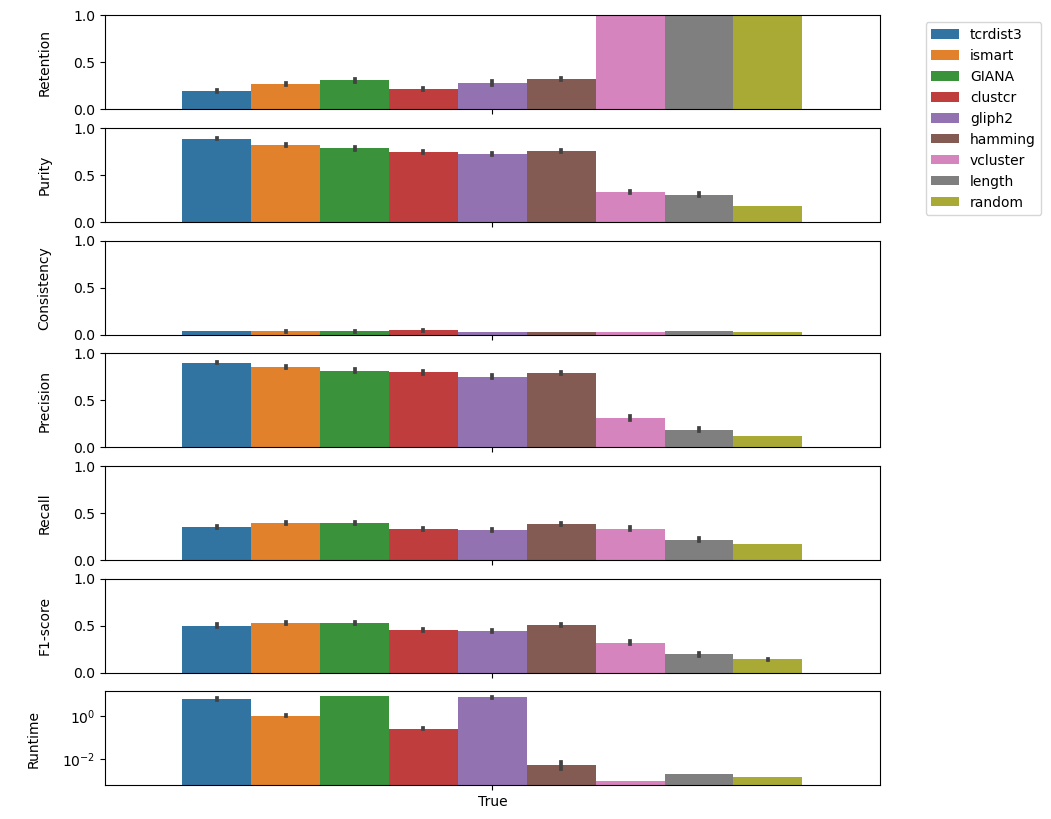

In [175]:

sub=results[results['Experiment']=='Full benchmarking - tcrdist subset']
hue_order = sub.sort_values('precision',ascending=False)['Model'].unique()
metrics = ['retention',
            'purity',
            'consistency',
            'precision',
            'recall',
            'f1-score',
            'Runtime']

fig, ax = plt.subplots(len(metrics),1, figsize = (10, 10), sharex=True)

for m, metric in enumerate(metrics):
    sns.barplot(sub, x = 'tcrdist_Chunk', y=metric, hue = 'Model',hue_order=hue_order, ax = ax[m])
    if m==0:
        ax[m].legend(loc=2,bbox_to_anchor=(1.05, 1))
    else:
        ax[m].legend([], [], frameon = False)
    if m ==2:
        ax[m].set_xlabel('\nOOM mode enabled')
    else:
        ax[m].set_xlabel(None)
    ax[m].set_ylabel('\n%s\n'%(metric.capitalize()))
    # ax[m].set_title('\n%s\n'%(metric.capitalize()))
    if metric == 'Runtime':
        ax[m].set_yscale('log')
    else:
        ax[m].set_ylim(0,1)

plt.show()

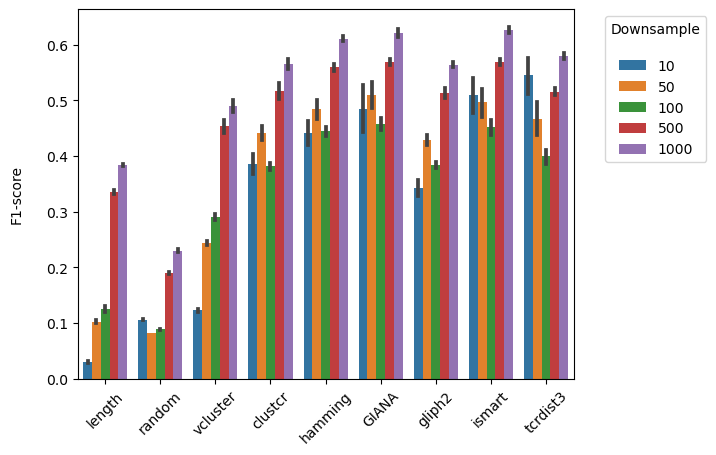

In [198]:
sub = results[results['Experiment']=='Full benchmarking - tcrdist subset']
fig, ax = plt.subplots(1, 1)
sns.barplot(data=sub,
                x='Model',
                y='f1-score',
                hue = 'Downsample',
                ax=ax,
                )    
ax.legend(title='Downsample\n',loc=2, bbox_to_anchor=(1.05, 1))
ax.set_ylabel('F1-score\n')
ax.set_xlabel(None)
ax.set_xticklabels(ax.get_xticklabels(),rotation =45)
plt.show()

/opt/miniconda3/envs/clustox_conda/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/opt/miniconda3/envs/clustox_conda/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


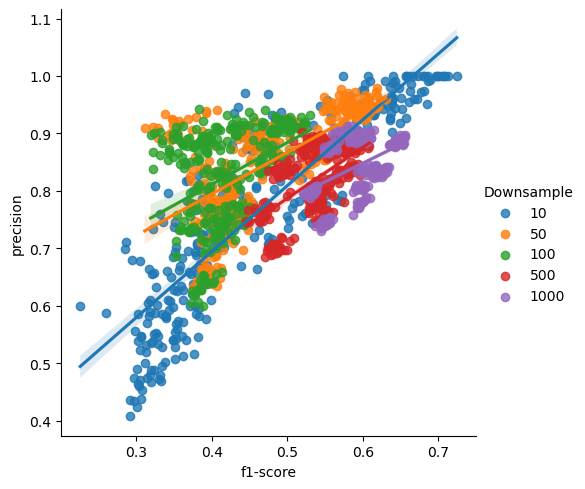

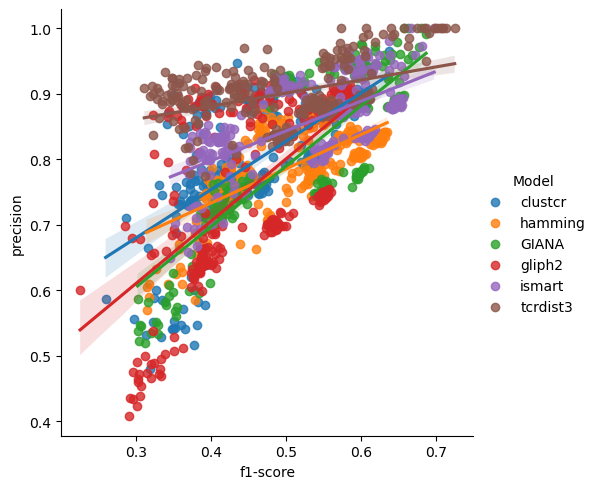

/opt/miniconda3/envs/clustox_conda/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/opt/miniconda3/envs/clustox_conda/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


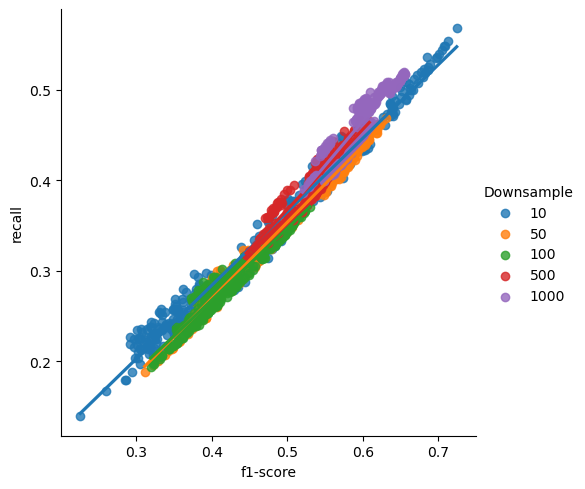

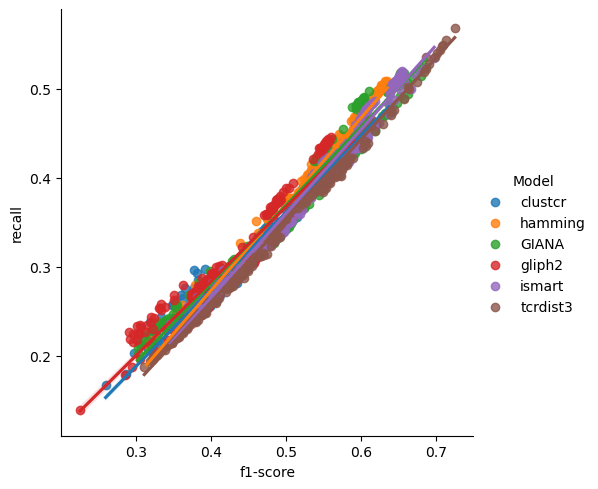

/opt/miniconda3/envs/clustox_conda/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/opt/miniconda3/envs/clustox_conda/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


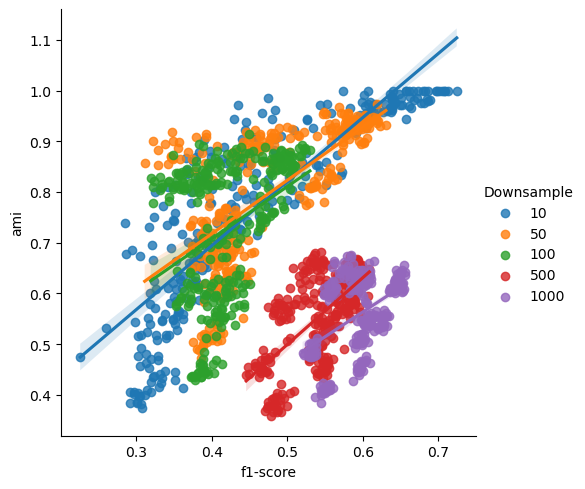

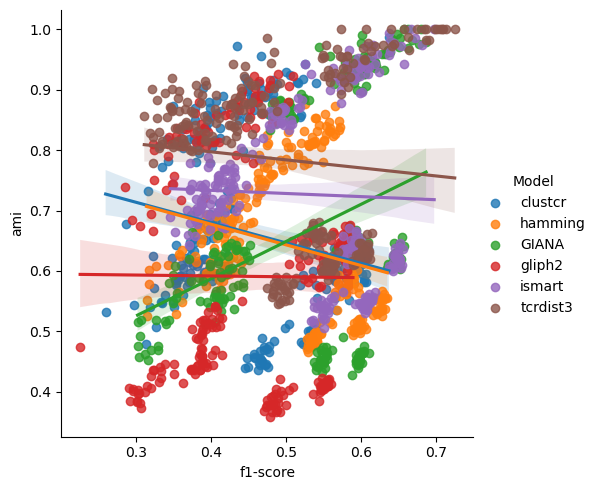

/opt/miniconda3/envs/clustox_conda/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/opt/miniconda3/envs/clustox_conda/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


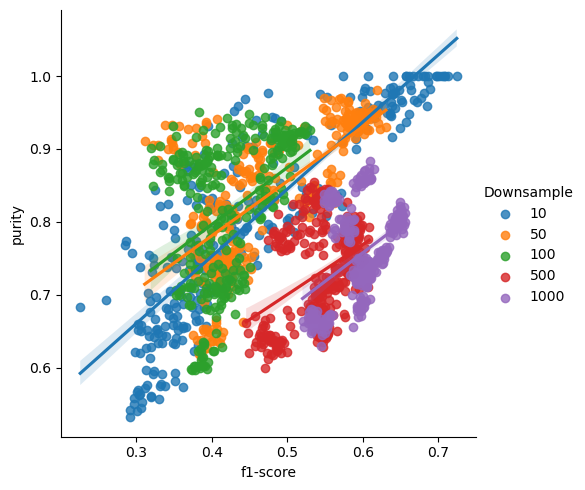

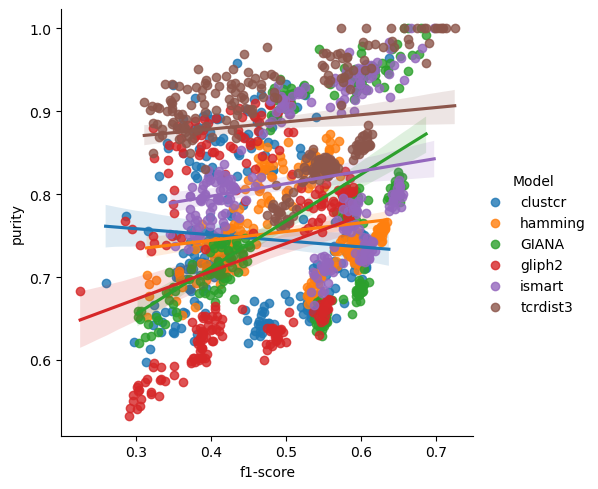

/opt/miniconda3/envs/clustox_conda/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/opt/miniconda3/envs/clustox_conda/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


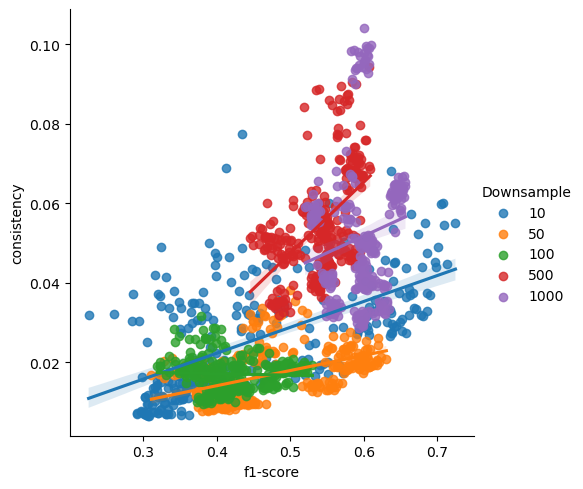

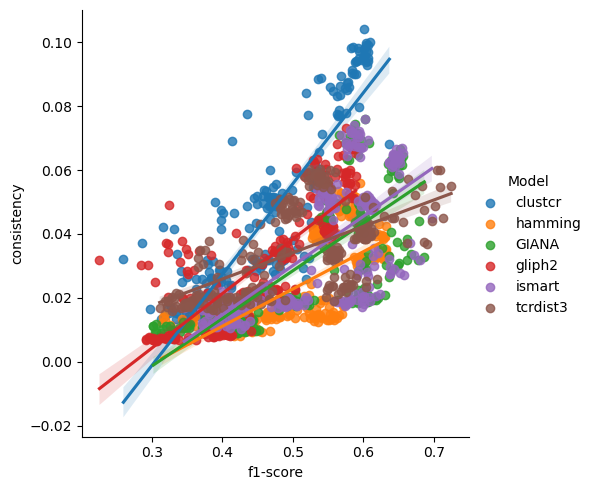

In [203]:
# sub['Model-Downsample']=sub['Model']+'-'+sub['Downsample'].astype(str)

for metric1, metric2 in [
                         ('precision', 'f1-score'),
                         ('recall', 'f1-score'),
                         ('ami','f1-score'),
                         ('purity','f1-score'),
                         ('consistency','f1-score'),
                         ]:
    sub2 =sub[~sub['Model'].isin(['length','random','vcluster'])]
    sns.lmplot(data=sub2,
                    x=metric2,
                    y=metric1,
                    hue = 'Downsample',
                    )
    sns.lmplot(data=sub2,
                    x=metric2,
                    y=metric1,
                    hue = 'Model',

                    )    

    plt.show()
    

In [310]:


def epresults(input_str):
    res = [str(x+'}}') for x in input_str.split('}') if x!='']
    out=[]
    for r in res:
        if r[0]==',':
            r='{'+r[2:]
            if r[-2:]!='}}':
                r=r+'}'
        out.append(literal_eval(r.replace('nan', '0')))
    odict ={}
    for o in out:
        key = list(o.keys())[0]
        val = o[key]
        odict[key]=val
    return odict

def extract_eps(df):
  out=pd.DataFrame()
  for i in range(len(df)):
      epscores = pd.DataFrame.from_dict(df['epscores'].iloc[i]).reset_index().rename(columns={'index':'epitope'})
      header = pd.DataFrame([[df.iloc[i][col]]*len(epscores) for col in ['Datetime',
                                                                          'Model', 
                                                                          'Downsample', 
                                                                          'Chain',
                                                                          'N_olga']]).T.rename(columns={0: 'Datetime',
                                                                                                        1: 'Model',
                                                                                                          2: 'Downsample',
                                                                                                          3: 'Chain',
                                                                                                          4: 'N_olga'})
      o_df  =pd.concat([header, epscores],axis=1)
      out=pd.concat([out, o_df])
  return out


In [305]:


# sub['Model-Downsample']=sub['Model']+'-'+sub['Downsample'].astype(str)
# sub2 =sub[~sub['Model'].isin(['length','random','vcluster'])]
sub = results[results['Experiment']=='Full benchmarking - tcrdist subset']

sub['epscores']=sub['epscores'].apply(epresults)
eps = extract_eps(sub)

In [298]:
eps

""


In [265]:
out.to_csv(os.path.join(parent, 'results_epitopes.csv'))

In [311]:
parent = 'results_publication2/OLGA'
results = pd.concat([pd.read_csv(os.path.join(parent, file,'total.csv'), index_col=0) for file in os.listdir(parent) if os.path.isdir(os.path.join(parent, file))])
results['Runtime']=results['Runtime'].apply(literal_eval).apply(lambda x: sum(x) if type(x)==list else x)


/var/folders/pp/qphvqyn14wl91lgf7368sfmw0000gn/T/ipykernel_42438/508954916.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([0, 0, 20, 40, 60, 80, 100])


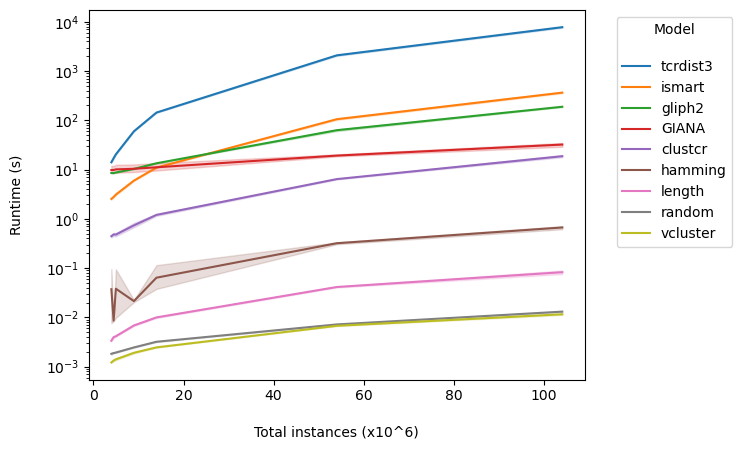

In [301]:
fig, ax = plt.subplots()
hue_order = results.sort_values('Runtime',ascending=False)['Model'].unique()
sns.lineplot(results, 
             x='N_total', 
             y='Runtime', 
             hue='Model', 
             hue_order=hue_order,
             ax=ax)
ax.set_ylabel('Runtime (s)\n')
ax.set_xticklabels([0, 0, 20, 40, 60, 80, 100])
ax.set_xlabel("\nTotal instances (x10^6)")
ax.legend(title='Model\n',
          loc=2,
          bbox_to_anchor=(1.05, 1))
plt.yscale('log')

In [296]:
results.to_csv(os.path.join(parent,'results_olga.csv'))

In [312]:
results['epscores']=results['epscores'].apply(epresults)
eps = extract_eps(results)

In [314]:
eps['N_olga'].unique()

array([500, 10000, 1000, 5000, 0, 100000, 50000], dtype=object)

In [315]:
eps.to_csv(os.path.join(parent,'results_olga_epitopes.csv'))